<a href="https://colab.research.google.com/github/Raihansyah-ai/Python/blob/main/Presensi%20Minggu%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [433]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [434]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [435]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [436]:
print("[INFO] loading images...")
imagePaths = paths.list_images("DATASET_DAUN")
data = []
labels = []

[INFO] loading images...


In [437]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [438]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [439]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [440]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [441]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.3, shuffle=True)
print(trainX.shape)
print(testX.shape)

(408, 128, 128, 3)
(176, 128, 128, 3)


In [448]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(128, 128, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Convolution2D(256, 3, 3, activation='relu'))
model1.add(MaxPooling2D(2, 2))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_220 (Conv2D)          (None, 42, 42, 64)        1792      
_________________________________________________________________
max_pooling2d_199 (MaxPoolin (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 7, 7, 256)         147712    
_________________________________________________________________
max_pooling2d_200 (MaxPoolin (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_106 (Flatten)        (None, 2304)              0         
_________________________________________________________________
dense_538 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_539 (Dense)            (None, 64)             

In [443]:
#from keras.models import Sequential
#from keras.layers.core import Flatten
#from keras.layers.core import Dense

#model = Sequential(
    #[
        #Flatten(input_shape=(64*64*3,)),
        #Dense(100, activation="relu", name="layer1"),
        #Dense(16, activation="relu", name="layer2"),
        #Dense(16, activation="relu", name="layer3"),
        #Dense(3, activation = "softmax", name="layer4"),
    #]
#)

In [444]:
#model.summary()

In [449]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
13/13 [==============================] - 1s 105ms/step - loss: 1.6165 - accuracy: 0.1936 - val_loss: 1.6110 - val_accuracy: 0.2045
Epoch 2/100
13/13 [==============================] - 1s 92ms/step - loss: 1.6111 - accuracy: 0.2132 - val_loss: 1.5982 - val_accuracy: 0.2273
Epoch 3/100
13/13 [==============================] - 1s 94ms/step - loss: 1.5703 - accuracy: 0.2966 - val_loss: 1.5582 - val_accuracy: 0.2102
Epoch 4/100
13/13 [==============================] - 1s 92ms/step - loss: 1.4559 - accuracy: 0.3309 - val_loss: 1.4664 - val_accuracy: 0.3523
Epoch 5/100
13/13 [==============================] - 1s 91ms/step - loss: 1.3566 - accuracy: 0.4265 - val_loss: 1.4969 - val_accuracy: 0.3352
Epoch 6/100
13/13 [==============================] - 1s 90ms/step - loss: 1.2864 - accuracy: 0.4632 - val_loss: 1.3954 - val_accuracy: 0.3523
Epoch 7/100
13/13 [==============================] - 1s 92ms/step - loss: 1.1838 - accuracy: 0.4951 - val_loss: 1.3096 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


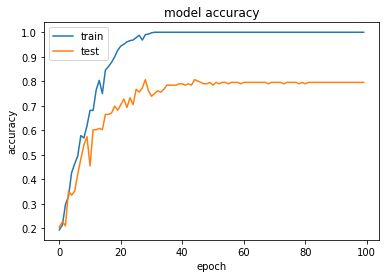

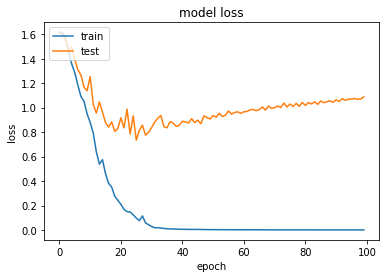

In [450]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [451]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.82      0.70      0.75        33
      GMB_02       0.82      0.73      0.77        37
      GMB_03       0.69      0.89      0.78        28
      GMB_04       0.76      0.89      0.82        36
      GMB_05       0.89      0.79      0.84        42

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.79       176
weighted avg       0.81      0.80      0.80       176



In [ ]:
#model.save('nnmodel_scene')

In [ ]:
#import cv2
#import matplotlib.pyplot as plt
#image1='Highway_Test.jpg'

In [ ]:
#img_array = cv2.imread(image1)
#plt.imshow(img_array)
#plt.show()
# print(type(img_array))

In [ ]:
#image_testing = Image.open('Highway_Test.jpg')
#image_testing = np.array(image_testing.resize((64, 64))) / 255.0
#image_testing.shape

In [ ]:
#image_testing = np.expand_dims(image_testing, axis=0)
#print(image_testing.shape)

In [ ]:
#output = model.predict(image_testing, 1)
#print(output)
#print(lb.classes_[output.argmax(axis=1)])